# ДОБРО ПОЖАЛОВАТЬ В HOMEWORK 4.3 

## 4.3 «Работа с данными»

## Вызываем стандартные команды

In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

## Работаем с API

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

## Обрабатываем данные: для каждой команды получаем количество игроков, голов, побед, проигрышей, матчей

In [7]:
for team in teams:
    
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    win = 0
    lose = 0
    matches = 0
    
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
  
        if team['name'] == f['homeTeamName']:
            if f['result']['goalsHomeTeam']: 
                if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']:
                    win += 1
                else:
                    lose += 1
        else:
            if f['result']['goalsAwayTeam']: 
                if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']:
                    win += 1
                else:
                    lose += 1
        if f['status'] == 'FINISHED':
            matches += 1
            
    print('Team "{}", {} players, {} goals, {} wins, {} lose, {} played matches'.
          format(team['name'], len(players), goals, win, lose, matches ))
    
    team['players'] = players
    team['goals'] = goals
    team['wins'] = win
    team['loses'] = lose
    team['played matches'] = matches

Team "FC Rio Ave", 30 players, 3 goals, 2 wins, 0 lose, 2 played matches
Team "FC Porto", 20 players, 5 goals, 2 wins, 0 lose, 2 played matches
Team "Moreirense FC", 28 players, 1 goals, 0 wins, 1 lose, 2 played matches
Team "FC Paços de Ferreira", 30 players, 2 goals, 0 wins, 1 lose, 2 played matches
Team "Sporting CP", 25 players, 3 goals, 2 wins, 0 lose, 2 played matches
Team "Maritimo Funchal", 30 players, 1 goals, 1 wins, 0 lose, 2 played matches
Team "CD Tondela", 26 players, 1 goals, 0 wins, 1 lose, 2 played matches
Team "SL Benfica", 25 players, 3 goals, 1 wins, 0 lose, 1 played matches
Team "Boavista Porto FC", 29 players, 2 goals, 0 wins, 2 lose, 2 played matches
Team "FC Arouca", 27 players, 33 goals, 9 wins, 13 lose, 34 played matches
Team "Vitoria Setubal", 26 players, 1 goals, 0 wins, 1 lose, 2 played matches
Team "C.F. Os Belenenses", 25 players, 1 goals, 1 wins, 0 lose, 2 played matches
Team "Vitoria Guimaraes", 24 players, 3 goals, 1 wins, 0 lose, 1 played matches
Team

In [8]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append(
            {'names': team['name'], 
             'players': len(team['players']), 
             'goals': team['goals'],
            'played matches' : team['played matches'],
            'loses' : team['loses'],
            'wins' : team['wins']}
        )

In [11]:
teams_pd = pd.DataFrame(team_for_pd)

def count_to_len(row):
    return len([i for i in row.names if i!=' '])
teams_pd

,goals,loses,names,played matches,players,wins
0,3,0,FC Rio Ave,2,30,2
1,5,0,FC Porto,2,20,2
2,1,1,Moreirense FC,2,28,0
3,2,1,FC Paços de Ferreira,2,30,0
4,3,0,Sporting CP,2,25,2
5,1,0,Maritimo Funchal,2,30,1
6,1,1,CD Tondela,2,26,0
7,3,0,SL Benfica,1,25,1
8,2,2,Boavista Porto FC,2,29,0
9,33,13,FC Arouca,34,27,9


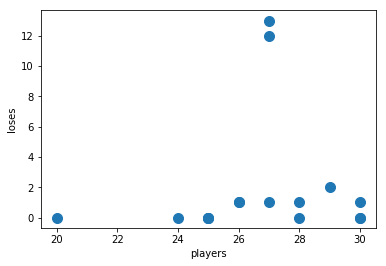

In [12]:
teams_pd.plot.scatter(x='players', y='loses', s=100)

## Удаляем колонки в таблице, оставляем поражения, игроки

In [13]:
teams_pd = teams_pd.drop(['goals','names','played matches','wins'], axis=1)

teams_pd

,loses,players
0,0,30
1,0,20
2,1,28
3,1,30
4,0,25
5,0,30
6,1,26
7,0,25
8,2,29
9,13,27


## Полготовка данных к кластеризации

In [14]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[  0.        ,  11.79891951],
       [  0.        ,   7.86594634],
       [  0.24902912,  11.01232487],
       [  0.24902912,  11.79891951],
       [  0.        ,   9.83243292],
       [  0.        ,  11.79891951],
       [  0.24902912,  10.22573024],
       [  0.        ,   9.83243292],
       [  0.49805825,  11.40562219],
       [  3.23737859,  10.61902756],
       [  0.24902912,  10.22573024],
       [  0.        ,   9.83243292],
       [  0.        ,   9.4391356 ],
       [  0.24902912,  10.61902756],
       [  0.        ,  11.01232487],
       [  2.98834947,  10.61902756]])

In [15]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[  0.19368932,  11.09972428],
        [  3.11286403,  10.61902756],
        [  0.        ,   9.36047614]]),
 array([0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1], dtype=int32))

In [16]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'g',
 'r',
 'b',
 'b',
 'r',
 'r',
 'g']

## Кластеризация 3 цвета

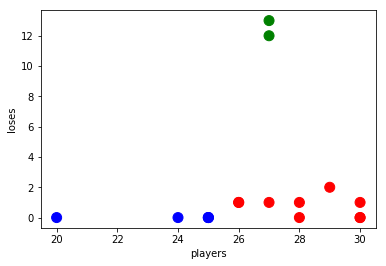

In [18]:
teams_pd.plot.scatter(x='players',y='loses', c=colors, s=100)

In [20]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[  3.11286403,  10.61902756],
        [  0.        ,   7.86594634],
        [  0.18677184,  11.70059518],
        [  0.08300971,   9.89798247],
        [  0.16601942,  10.88122577]]),
 array([2, 1, 4, 2, 3, 2, 3, 3, 2, 0, 3, 3, 3, 4, 4, 0], dtype=int32))

In [21]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'm',
 'b',
 'y',
 'b',
 'y',
 'y',
 'b',
 'r',
 'y',
 'y',
 'y',
 'm',
 'm',
 'r']

## Кластеризация 5 цветов

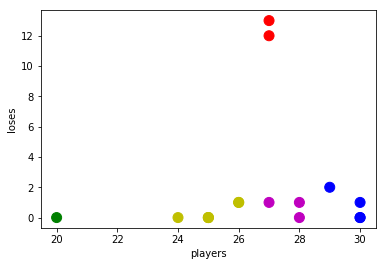

In [22]:
teams_pd.plot.scatter(x='players',y='loses', c=colors, s=100)